# SPAM SMS DETECTION

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

# importing dependencies for nlp
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/deepa/Desktop/SPAM SMS DETECTION/spam.csv", encoding='ISO-8859-1', usecols=[0, 1])

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

# Renaming the columns

In [7]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
df.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [10]:
# checkingn for duplicate values
df.duplicated().sum()

403

In [11]:
#removing the duplicates values from the data
df = df.drop_duplicates(keep= 'first')

In [12]:
df.groupby('label').describe().transpose()

label                                                      ham  \
text count                                                4516   
     unique                                               4516   
     top     Go until jurong point, crazy.. Available only ...   
     freq                                                    1   

label                                                     spam  
text count                                                 653  
     unique                                                653  
     top     Free entry in 2 a wkly comp to win FA Cup fina...  
     freq                                                    1

# Data Preparation

In [13]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

<Axes: ylabel='label'>

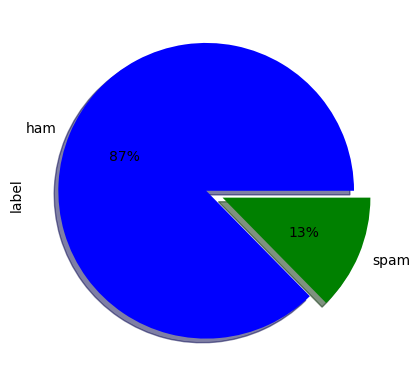

In [14]:
plot_df = df.label.value_counts()
colors = ['blue','green']
explode = (0.06 , 0.06)
plot_df.plot(kind = "pie" ,shadow = True, explode=explode, colors=colors,autopct='%1.0f%%')

In [15]:
#Convert6 categorical values into numerical in label column
df.loc[df['label'] == 'spam' , 'label'] = 1
df.loc[df['label'] == 'ham' , 'label'] = 0

C:\Users\deepa\AppData\Local\Temp\ipykernel_11668\2691552632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['label'] == 'spam' , 'label'] = 1
C:\Users\deepa\AppData\Local\Temp\ipykernel_11668\2691552632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['label'] == 'ham' , 'label'] = 0


In [17]:
#For imbalancing dataset
df_largest = df[df['label'] ==0]
df_smallest = df[df['label']==1]

In [19]:
#Resampling with replacement
df_smallest_unsampled = resample(df_smallest , replace='True' , n_samples=4825 , random_state=0)
df = pd.concat([df_largest , df_smallest_unsampled])

In [20]:
df['label'].value_counts()

1    4825
0    4516
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

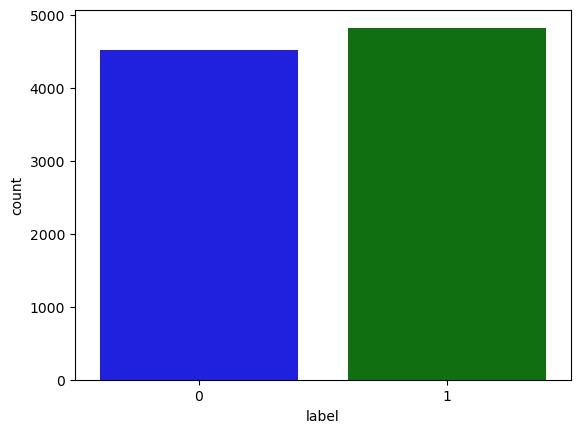

In [27]:
sns.countplot(x='label' , data=df , palette=['b','g'])

In [22]:
X = df['text']
y = df['label']

In [23]:
# Train Test Split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)

# Vectorization

In [24]:
vect = TfidfVectorizer(min_df=1, stop_words='english' , lowercase=True)

In [25]:
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [26]:
#label columns is in object type we need top covert it into integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Building

In [28]:
model = MultinomialNB()
model.fit(X_train_vect , y_train)

MultinomialNB()

# Prediction and accuracy

In [29]:
pred = model.predict(X_test_vect)
acc = accuracy_score(y_test, pred)
print('Accuracy:' , acc.round(4)*100, '%')

Accuracy: 97.75 %
